In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df.head()

,Unnamed: 0,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,0,2019-01-26,86,1,3,0,1,2,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,1,2019-01-26,8,2,2,1,1,4,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2,2019-01-26,25,1,2,1,2,3,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,3,2019-01-26,8,2,2,0,1,3,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,4,2019-01-26,17,2,2,0,3,5,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


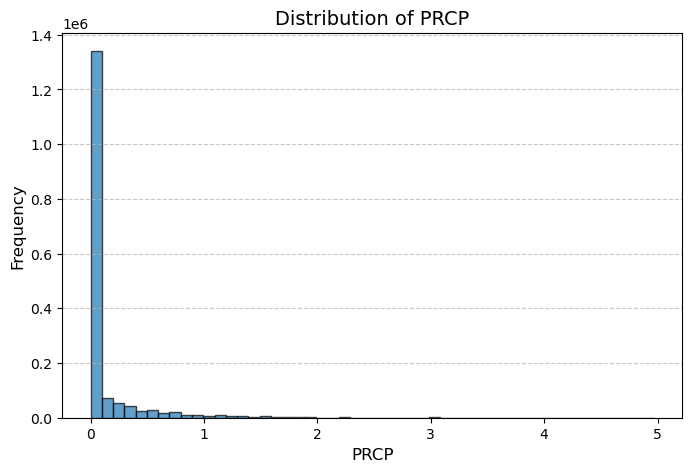

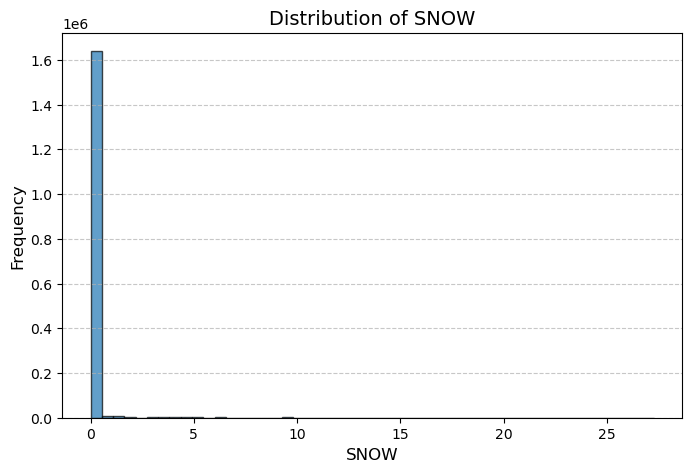

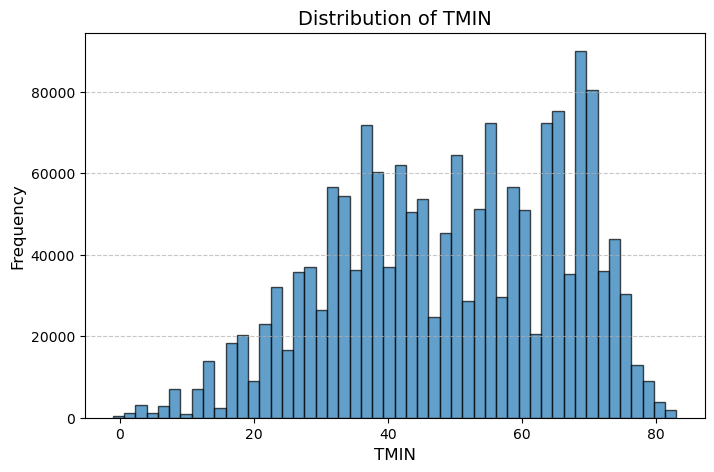

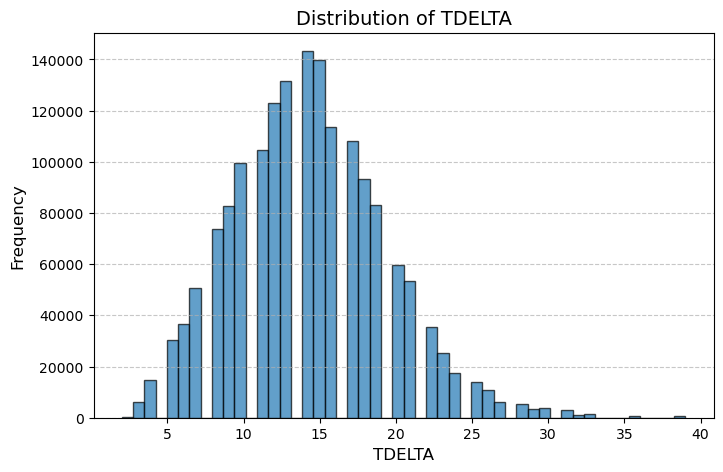

In [4]:

# Plotting the distributions of the original values for PRCP, SNOW, TMIN, and TDELTA
for column in ['PRCP', 'SNOW', 'TMIN', 'TDELTA']:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [5]:
columns_to_standardize = ['PRCP', 'SNOW', 'TMIN', 'TDELTA']


scaler = StandardScaler()

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
# Displaying the normalized values for verification
df[['PRCP', 'SNOW', 'TMIN', 'TDELTA']].head()
# Displaying the standardized values for verification
df[columns_to_standardize].head()

,PRCP,SNOW,TMIN,TDELTA
0,-0.35824,-0.114487,-1.470692,-0.65208
1,-0.35824,-0.114487,-1.470692,-0.65208
2,-0.35824,-0.114487,-1.470692,-0.65208
3,-0.35824,-0.114487,-1.470692,-0.65208
4,-0.35824,-0.114487,-1.470692,-0.65208


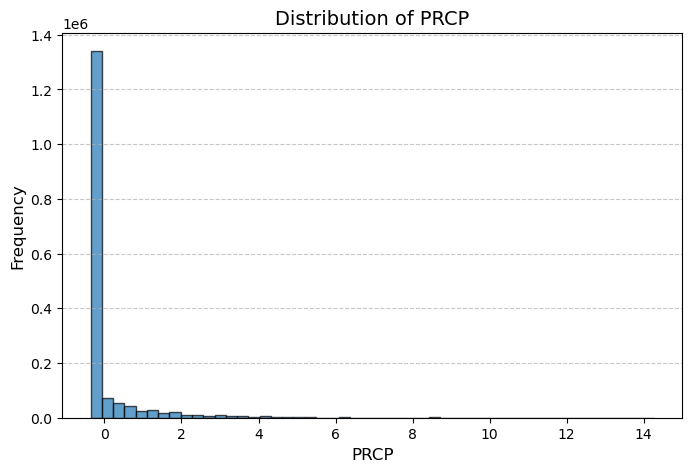

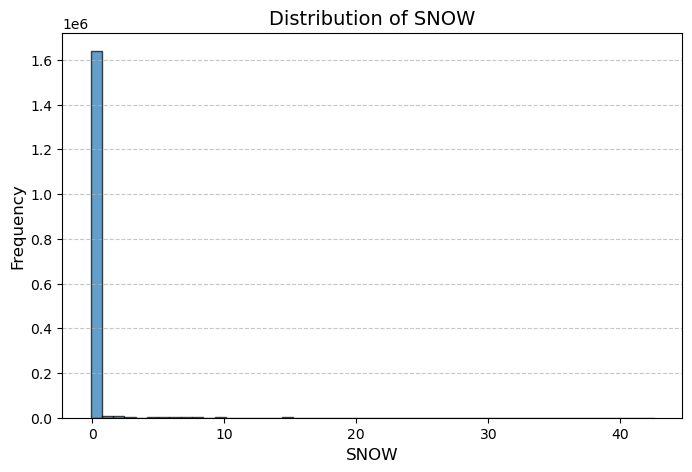

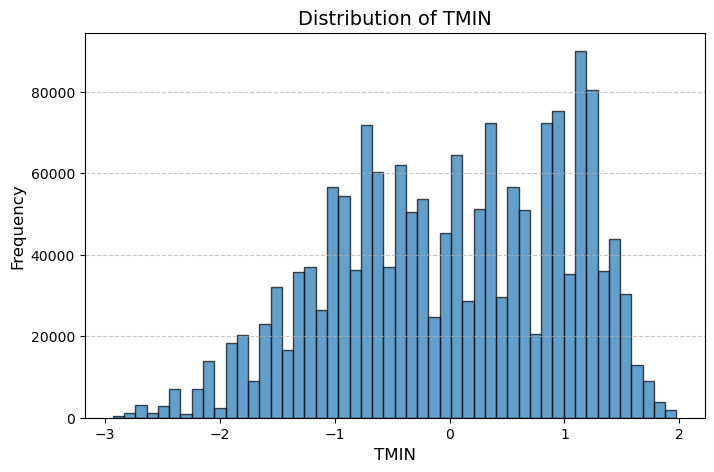

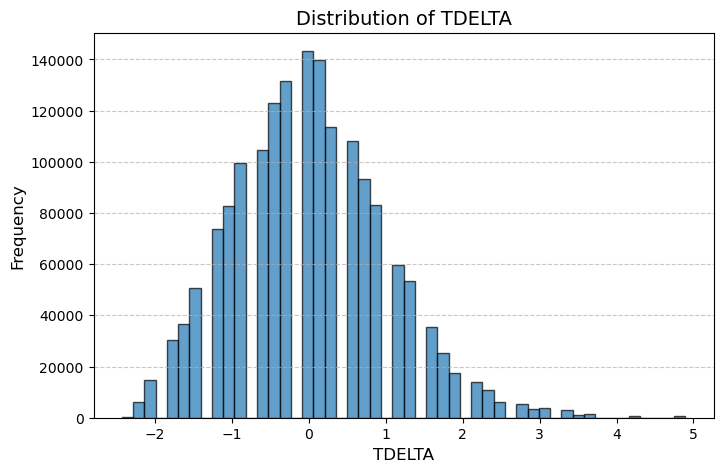

In [6]:
# Plotting the distributions of the original values for PRCP, SNOW, TMIN, and TDELTA
for column in ['PRCP', 'SNOW', 'TMIN', 'TDELTA']:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Predict level of Crime
### OLS

In [7]:

# Selecting potential independent variables
independent_vars = ['ofns_desc', 'age_group', 'perp_sex', 'perp_race',
                    'arrest_boro', 'arrest_precinct', 'jurisdiction_code', 
                    'PRCP', 'SNOW', 'TMIN', 'TDELTA','arrest_year','arrest_month','arrest_day']

# Target variable
target_var = 'law_cat_cd'


# Splitting data into features and target
X = df[independent_vars]
y = df[target_var]

# Adding a constant for OLS
X = add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the OLS model
ols_model = OLS(y_train, X_train).fit()

# Displaying the model summary
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             law_cat_cd   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3889.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:44:10   Log-Likelihood:            -9.2629e+05
No. Observations:             1174038   AIC:                         1.853e+06
Df Residuals:                 1174023   BIC:                         1.853e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                73.4462      0.514    142.792      0.000      72.438      74.454
ofns_desc             0.0026   1.61e-05    161.503      0.000       0.003       0.003
age_group             0.0264      0.001     45.095      0.000       0.025       0.028
perp_sex              0.0063      0.001      4.873      0.000       0.004       0.009
perp_race             0.0056      0.000     13.497      0.000       0.005       0.006
arrest_boro          -0.0012      0.000     -2.695      0.007      -0.002      -0.000
arrest_precinct      -0.0008   1.58e-05    -53.659      0.000      -0.001      -0.001
jurisdiction_code    -0.0006   4.98e-05    -12.352      0.000      -0.001      -0.001
PRCP                 -0.0008      0.001     -1.576      0.115      -0.002       0.000
SNOW                 -0.0008      0.001     -1.547      0.122      -0.002       0.000
TMIN                  0.0021      0.001      3.826      0.000       0.001       0.003
TDELTA                0.0050      0.001      9.889      0.000       0.004       0.006
arrest_year          -0.0356      0.000   -139.579      0.000      -0.036      -0.035
arrest_month         -0.0029      0.000    -18.384      0.000      -0.003      -0.003
arrest_day        -4.911e-05   5.67e-05     -0.866      0.386      -0.000     6.2e-05
==============================================================================
Omnibus:                    15339.201   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15949.472
Skew:                          -0.285   Prob(JB):                         0.00
Kurtosis:                       3.008   Cond. No.                     2.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
y_test_pred = ols_model.predict(X_test)
r2_test_score = r2_score(y_test, y_test_pred)
r2_test_score

0.04521463449801855

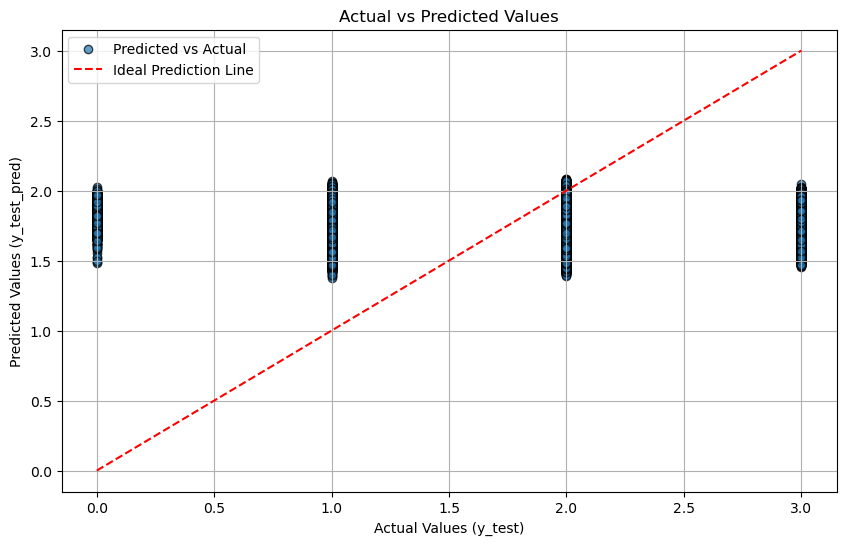

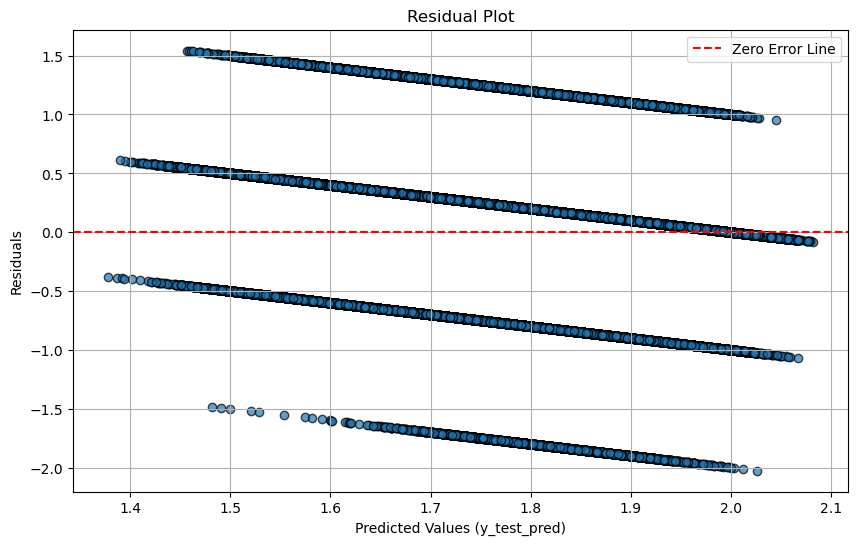

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values (y_test_pred)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

### classification

### balance the data

In [10]:
data_combined = pd.concat([X, y], axis=1)

# Separate the data by classes
class_0 = data_combined[data_combined['law_cat_cd'] == 0]
class_1 = data_combined[data_combined['law_cat_cd'] == 1]
class_2 = data_combined[data_combined['law_cat_cd'] == 2]
class_3 = data_combined[data_combined['law_cat_cd'] == 3]

# Determine the target size (equal to the largest class)
target_size = max(len(class_1), len(class_2), len(class_3))

# Oversample minority classes
class_0_upsampled = resample(class_0, replace=True, n_samples=target_size, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=target_size, random_state=42)
class_3_upsampled = resample(class_3, replace=True, n_samples=target_size, random_state=42)

# Combine all classes into a balanced dataset
data_balanced = pd.concat([class_0_upsampled, class_1_upsampled, class_2, class_3_upsampled])

# Separate features and target from the balanced dataset
X_balanced = data_balanced[independent_vars]
y_balanced = data_balanced[target_var]

# Checking the new class distribution
balanced_distribution = y_balanced.value_counts()

In [11]:
balanced_distribution

law_cat_cd
0    1096828
1    1096828
2    1096828
3    1096828
Name: count, dtype: int64

In [12]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Splitting the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Training the Random Forest model
rf_model.fit(X_train_balanced, y_train_balanced)

# Making predictions on the test set
y_pred_balanced = rf_model.predict(X_test_balanced)

# Evaluating the model's performance
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced)

In [13]:
# Displaying the evaluation results
accuracy_balanced

0.9730518551779391

In [14]:
conf_matrix_balanced

array([[219366,      0,      0,      0],
       [     4, 212244,   6730,    387],
       [   541,  15865, 202904,     56],
       [    53,     10,      0, 219303]])

In [15]:
print(classification_rep_balanced)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219366
           1       0.93      0.97      0.95    219365
           2       0.97      0.92      0.95    219366
           3       1.00      1.00      1.00    219366

    accuracy                           0.97    877463
   macro avg       0.97      0.97      0.97    877463
weighted avg       0.97      0.97      0.97    877463

